In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['cell_images']


In [15]:
from fastai import *
from fastai.vision import *

In [16]:
path = Path('../input/cell_images/')

In [17]:
data = (ImageList.from_folder(path)
       .split_by_rand_pct(0.1)
       .label_from_folder()
       .transform(get_transforms(), size = 32)
       .databunch('.', bs = 64)
       .normalize(imagenet_stats)
       )

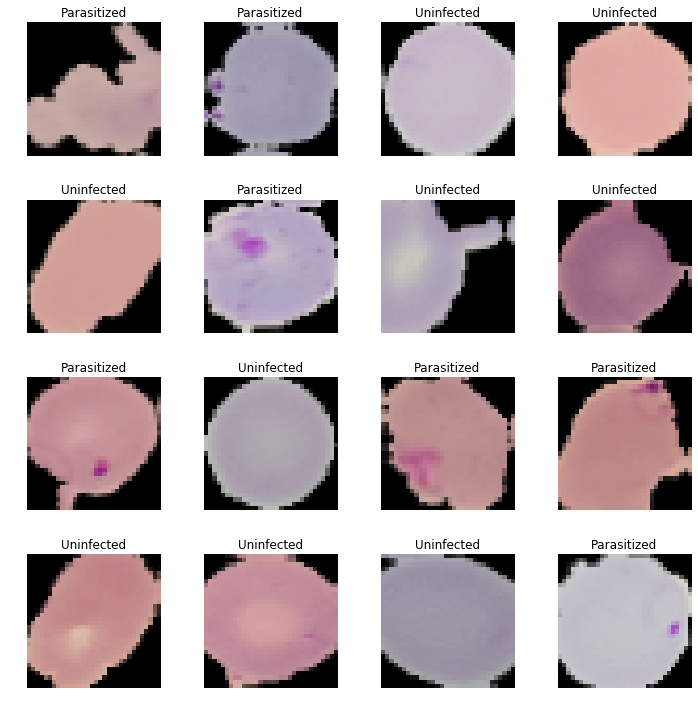

In [18]:
data.show_batch(4, figsize = (10, 10))

In [ ]:
learner = cnn_learner(data, models.densenet161, metrics = [error_rate, accuracy])

In [ ]:
learner.fit_one_cycle(8)

In [11]:
learner.unfreeze()
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


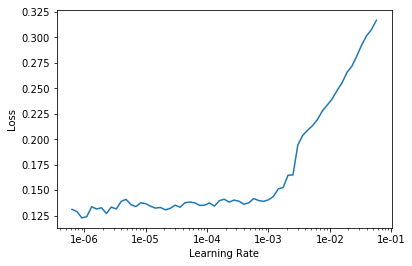

In [12]:
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(8, max_lr = slice(1e-4))